# Importacion de librerias

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [4]:
base_hs = pd.read_csv('C:/Users/MyDELL/Desktop/msds/repositorio/household_energy/datasets/Energy_consumption_dataset.csv')

In [7]:
base_hs.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [18]:
print(base_hs.columns)

Index(['Month', 'Hour', 'DayOfWeek', 'Holiday', 'Temperature', 'Humidity',
       'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage',
       'RenewableEnergy', 'EnergyConsumption'],
      dtype='object')


In [9]:
base_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [19]:
print(base_hs.shape)

(5000, 12)


In [40]:
base_hs['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [41]:
base_hs['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [42]:
base_hs['DayOfWeek'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [46]:
base_hs['LightingUsage'].unique()

array(['Off', 'On'], dtype=object)

In [50]:
base_hs['Occupancy'].unique()

array([5, 1, 2, 9, 6, 8, 0, 4, 3, 7], dtype=int64)

# la informacion del dataset tiene un limite de 7 personas

In [45]:
base_hs['HVACUsage'].unique()

array(['On', 'Off'], dtype=object)

# Las columnas de Humidity, 'Temperature', 'Humidity','SquareFootage','RenewableEnergy', 'EnergyConsumption' no se analizaron con la funcion unique porque son valores numericos que se diferencia en cada instancia

In [ ]:
base_hs['DayOfWeek'].unique()

In [23]:
valores_nul = base_hs.isnull().sum()
print (valores_nul)

Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64


In [25]:
valores_nul = base_hs.isnull().sum()
print (valores_nul)

Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64


# No existen valores nulos en el data set

In [28]:
valores_nul = base_hs.isna().sum()
print (valores_nul)

Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64


# No existen valores NaN en el Data Set

In [56]:
base_hs.duplicated().sum()

0

# No existen incidencias duplicadas en el dataset

In [58]:
for col in base_hs.columns:
    print(f"{col}: {base_hs[col].duplicated().sum()} duplicados")

Month: 4988 duplicados
Hour: 4976 duplicados
DayOfWeek: 4993 duplicados
Holiday: 4998 duplicados
Temperature: 591 duplicados
Humidity: 511 duplicados
SquareFootage: 290 duplicados
Occupancy: 4990 duplicados
HVACUsage: 4998 duplicados
LightingUsage: 4998 duplicados
RenewableEnergy: 525 duplicados
EnergyConsumption: 63 duplicados


# Analizando lo duplicados por cada columnas es importante mencionar que si bien existen, estos deben tomarse con cuidado ya que las columnas de Month, Hour, Dayofweek, HVACUsage, LightinUsage son variables categoriacas, por lo cual sus varoles tiendan a repetirse. Mientras en las caracteristicas (columnas) restantes, si bien pueden existir valores repetidos, se debe analizar toda la combinacion de incidencias (incidencia completa) realizadas en la seccion anterio

In [54]:
excluir= ['Month', 'Hour']#se excluyen Month y Hour porque no son valores que se puedan analizar las estaditica
base_hs_fil = base_hs.drop(columns = excluir)
base_hs_fil.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,24.946823,45.478146,1507.403201,4.576000,15.201195,76.794919
std,3.041678,8.972690,293.147209,2.906185,9.157038,9.231573
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.453790,38.111104,1253.906598,2.000000,7.477928,70.419588
50%,24.831846,45.793124,1513.581105,5.000000,15.343830,76.696267
75%,27.427281,52.696651,1754.846457,7.000000,22.889997,83.246274
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


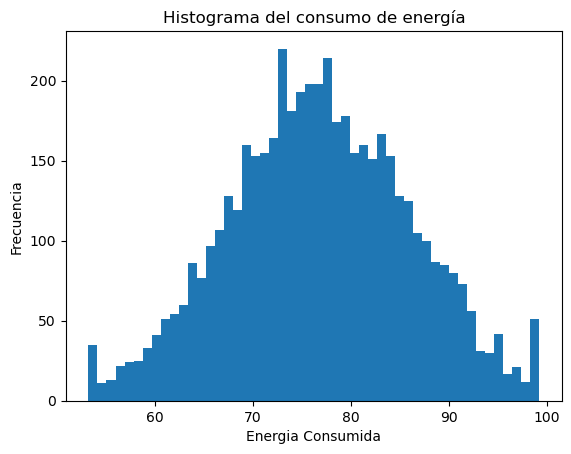

In [65]:
# Distribución del consumo de energía
plt.hist(base_hs['EnergyConsumption'], bins=50)
plt.title('Histograma del consumo de energía')
plt.xlabel('Energia Consumida')
plt.ylabel('Frecuencia')
plt.show()

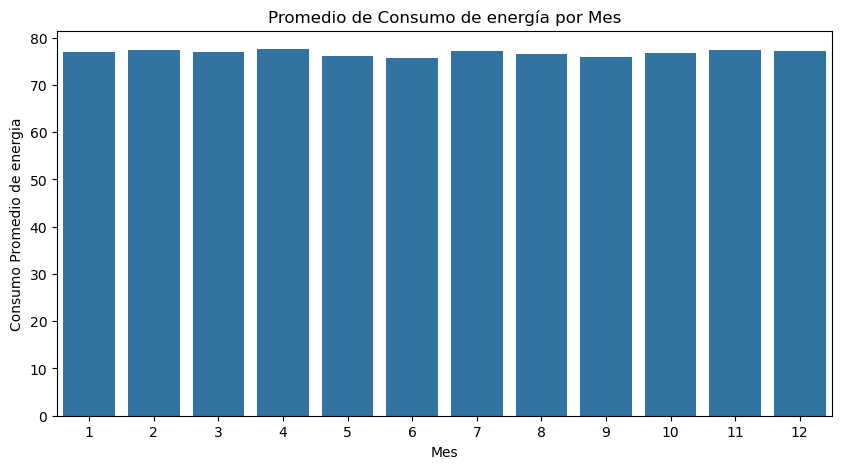

In [75]:
cons_mth = base_hs.groupby('Month')['EnergyConsumption'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=cons_mth.index, y=cons_mth.values)
plt.title('Promedio de Consumo de energía por Mes')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio de energia')
plt.show()

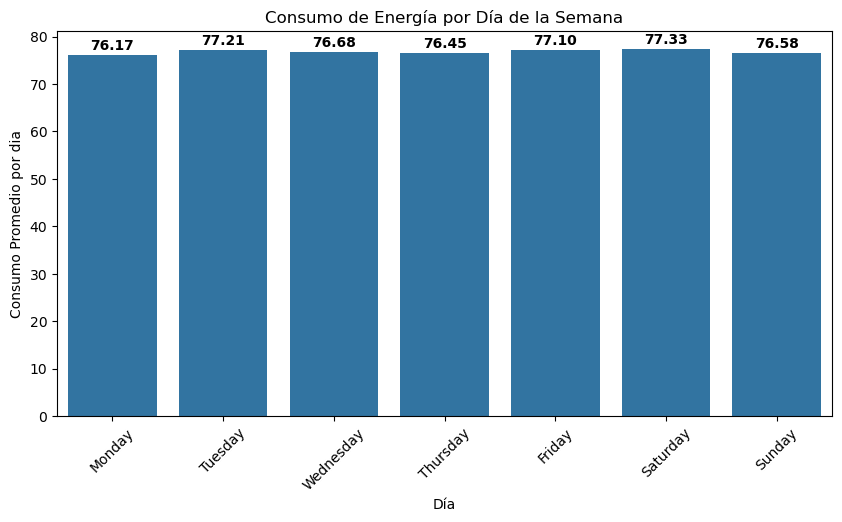

In [85]:
sort_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cons_day = base_hs.groupby('DayOfWeek')['EnergyConsumption'].mean().reindex(sort_day)

plt.figure(figsize=(10,5))
sns.barplot(x=cons_day.index, y=cons_day.values)
plt.title('Consumo de Energía por Día de la Semana')
plt.xlabel('Día')
plt.ylabel('Consumo Promedio por dia')
plt.xticks(rotation=45)
for i, valor in enumerate(cons_day.values):
    plt.text(i, valor + 0.5, f'{valor:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

# los valores promedio muestran que la diferencia no es muy marcada entre los dias de la semana

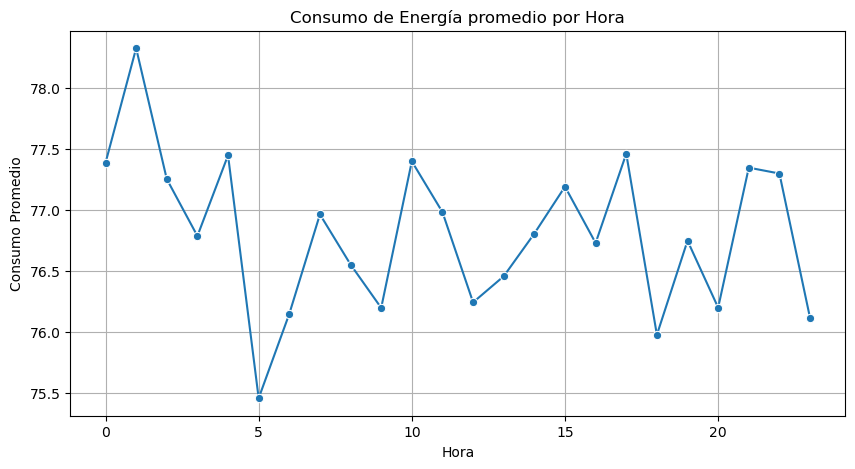

In [77]:
cons_hr = base_hs.groupby('Hour')['EnergyConsumption'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=cons_hr.index, y=cons_hr.values, marker='o')
plt.title('Consumo de Energía promedio por Hora')
plt.xlabel('Hora')
plt.ylabel('Consumo Promedio')
plt.grid()
plt.show()

# se deberealizar una observacion al dataset y analizar el data set el consumo promedio a la 1 am

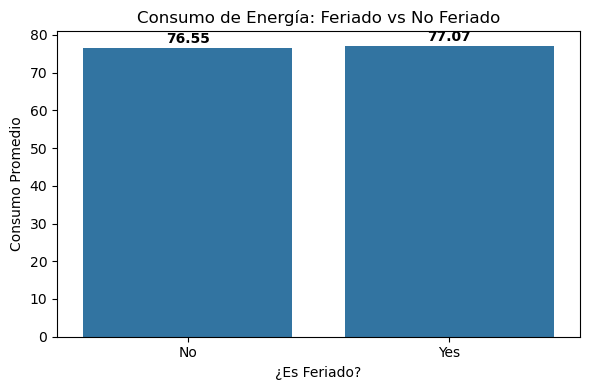

In [84]:
cons_hl = base_hs.groupby('Holiday')['EnergyConsumption'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=cons_hl.index, y=cons_hl.values)
plt.title('Consumo de Energía: Feriado vs No Feriado')
plt.xlabel('¿Es Feriado?')
plt.ylabel('Consumo Promedio')

for i, valor in enumerate(cons_hl.values):
    plt.text(i, valor + 0.5, f'{valor:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# El grafico nos muestra que el feriado influye muy poco en el consumo de energia

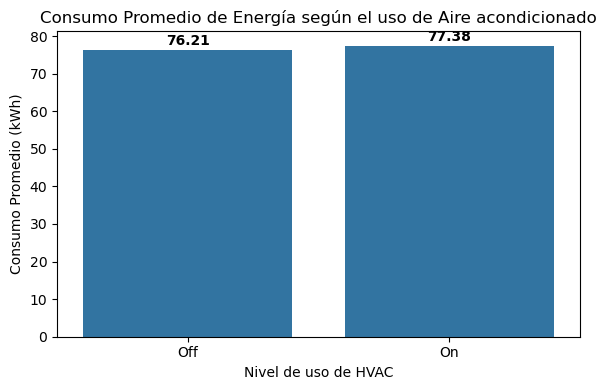

In [88]:
cons_hvac = base_hs.groupby('HVACUsage')['EnergyConsumption'].mean().sort_values()

# Gráfico de barras
plt.figure(figsize=(6,4))
ax = sns.barplot(x=cons_hvac.index, y=cons_hvac.values)

# Título y etiquetas
plt.title('Consumo Promedio de Energía según el uso de Aire acondicionado')
plt.xlabel('Nivel de uso de HVAC')
plt.ylabel('Consumo Promedio (kWh)')

# Etiquetas encima de las barras
for i, valor in enumerate(cons_hvac.values):
    plt.text(i, valor + 0.5, f'{valor:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# El grafico nos muestra que el consumo de aire acondicionado no genera una diferencia muy evidente en el consumo de los hogares

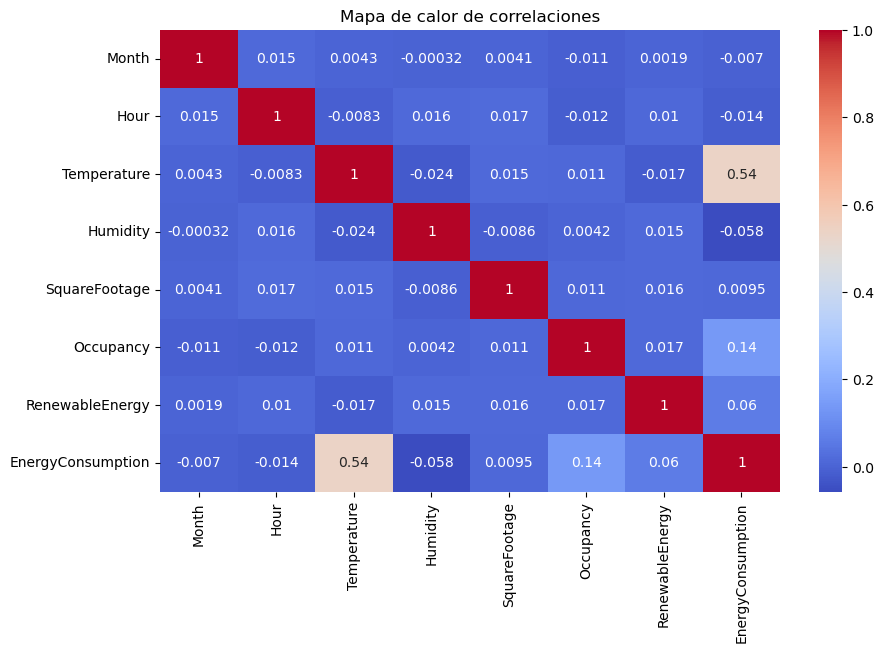

In [92]:
plt.figure(figsize=(10, 6))
sns.heatmap(base_hs.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

# se puede tener como analisis que para la proyeccion de consumo de energia las variables de temperatura y ocupacion son las que mas influyen si se desea analizar la proyeccion de esta caracteristica

<Axes: xlabel='Temperature', ylabel='EnergyConsumption'>

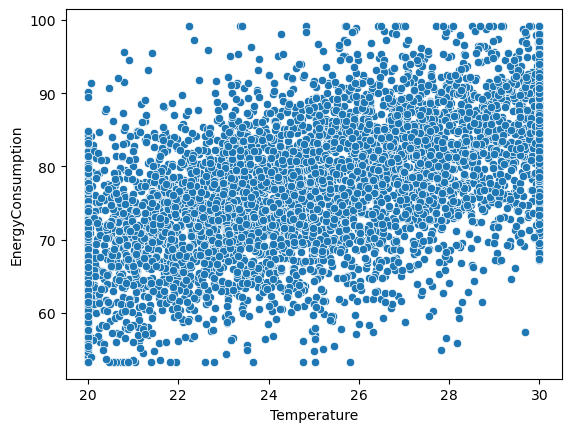

In [96]:
sns.scatterplot(x='Temperature', y='EnergyConsumption', data=base_hs)

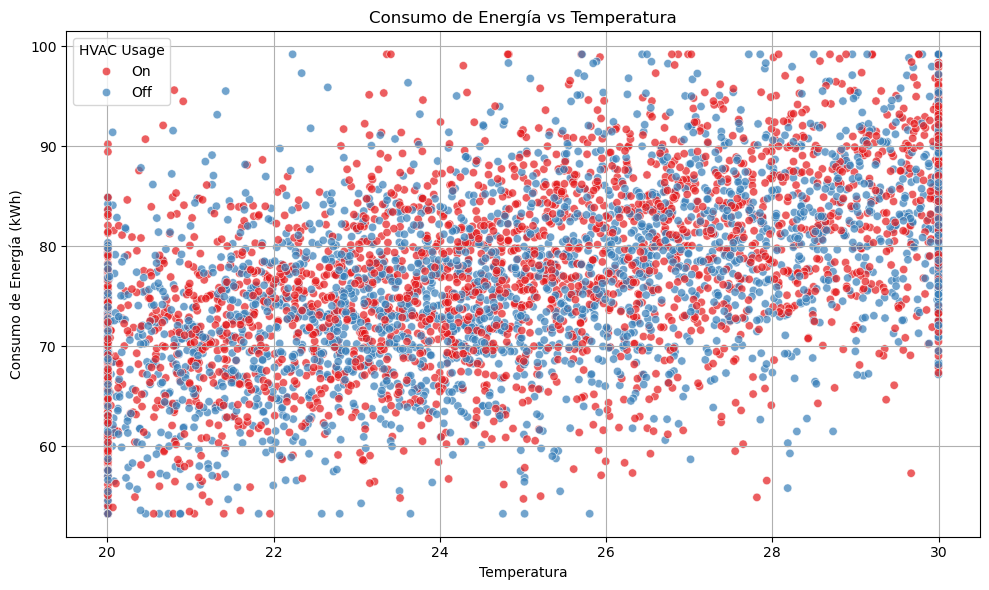

In [110]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x='Temperature',
    y='EnergyConsumption',
    data=base_hs,
    hue='HVACUsage',
    palette='Set1',    
    alpha=0.7
)

plt.title('Consumo de Energía vs Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Consumo de Energía (kWh)')
plt.legend(title='HVAC Usage')
plt.grid(True)
plt.tight_layout()
plt.show()

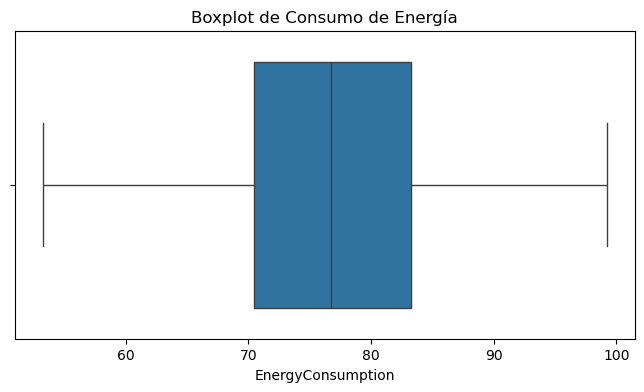

In [103]:
plt.figure(figsize=(8,4))#detencion de outliyers
sns.boxplot(x=base_hs['EnergyConsumption'])
plt.title('Boxplot de Consumo de Energía')
plt.show()

# no se pueden identificar outliyers de manera rapida con el boxplot

In [106]:
# Detectar outliers para EnergyConsumption usando IQR
Q1 = base_hs['EnergyConsumption'].quantile(0.25)
Q3 = base_hs['EnergyConsumption'].quantile(0.75)
IQR = Q3 - Q1

# Límites
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = base_hs[(base_hs['EnergyConsumption'] < lim_inf) | (base_hs['EnergyConsumption'] > lim_sup)]

print(f"Outliers encontrados: {outliers.shape[0]}")

Outliers encontrados: 0
